# **Implementation of Optimization Algorithms**

---


<br><br>
This repository contains implementations of key concepts and algorithms from the Optimization Techniques for Data Science course. It explores a variety of optimization methods commonly used in machine learning and data science, including both classical and modern techniques.

The project aims to provide clear, well-documented code examples that demonstrate how optimization principles can be applied to real-world data science problems. Each implementation is structured to support experimentation, learning, and practical understanding of the underlying mathematical foundations.

Contributors:
<br><br>

**Saksham Saklani (2023BCD0049)**

**Namitsai Vaddempudi (2023BCD0041)**




# Basic Gradient Descent Algorithm



Optimized Parameters (theta_0, theta_1):
 [[4.14472392]
 [3.22246847]]

Final Cost: 0.5295114421146873


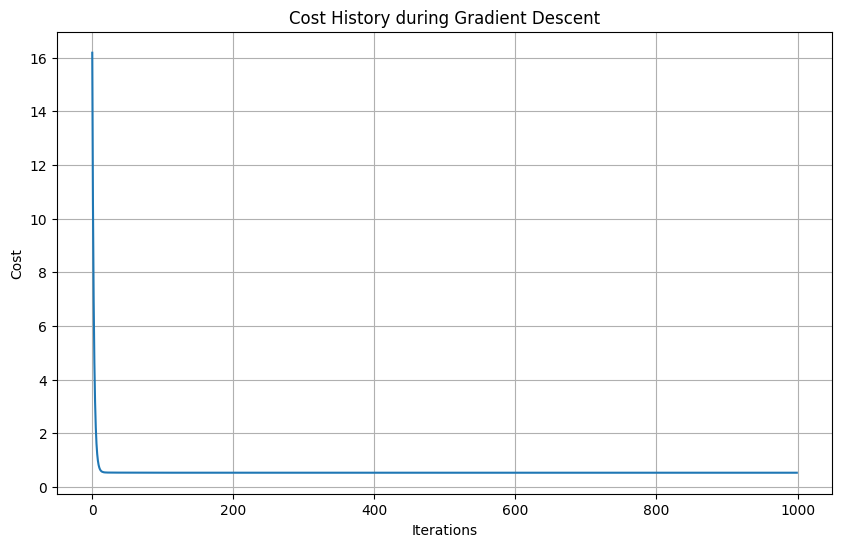

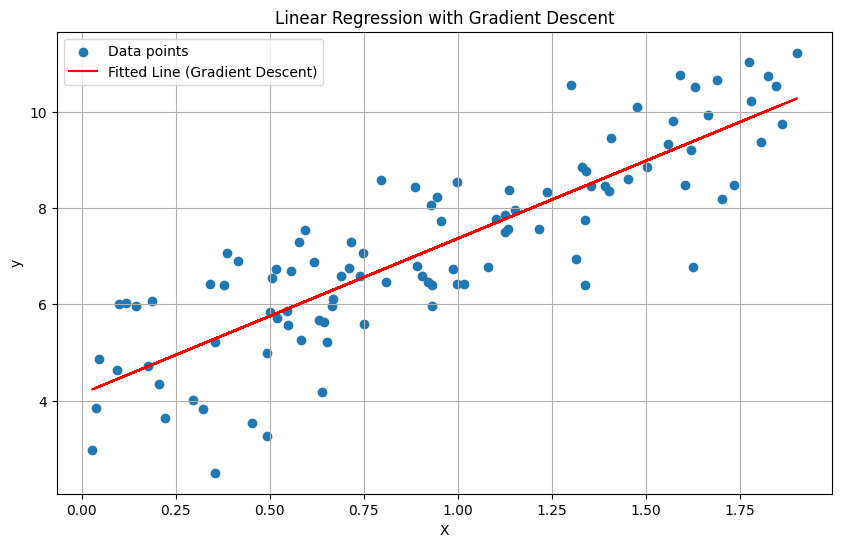

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add a bias term to X (x0 = 1)
X_b = np.c_[np.ones((100, 1)), X]

# 2. Define the cost function (Mean Squared Error)
def cost_function(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

# 3. Define the gradient of the cost function
def gradient(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    grad = (1/m) * X.T.dot(predictions - y)
    return grad

# 4. Implement Gradient Descent
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    m = len(y)
    cost_history = []

    for iteration in range(n_iterations):
        gradients = gradient(X, y, theta)
        theta = theta - learning_rate * gradients
        cost = cost_function(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

# Initial parameters (theta_0, theta_1)
np.random.seed(42)
theta = np.random.randn(2, 1) # Random initialization

# Hyperparameters
learning_rate = 0.1
n_iterations = 1000

# Run Gradient Descent
theta_final, cost_history = gradient_descent(X_b, y, theta, learning_rate, n_iterations)

print("Optimized Parameters (theta_0, theta_1):\n", theta_final)
print("\nFinal Cost:", cost_history[-1])

# Plotting the cost history
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost History during Gradient Descent")
plt.grid(True)
plt.show()

# Plotting the data and the fitted line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Data points")
plt.plot(X, X_b.dot(theta_final), color='red', label="Fitted Line (Gradient Descent)")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression with Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()


# Exact Line Search

Closed Form: [ 1.475 -0.019 -1.971 -0.014  0.004  0.806]
Exact Line Search GD: [ 1.475 -0.019 -1.971 -0.014  0.004  0.806]


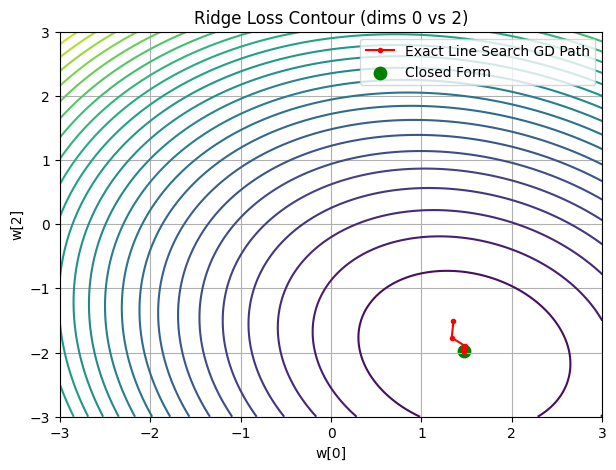

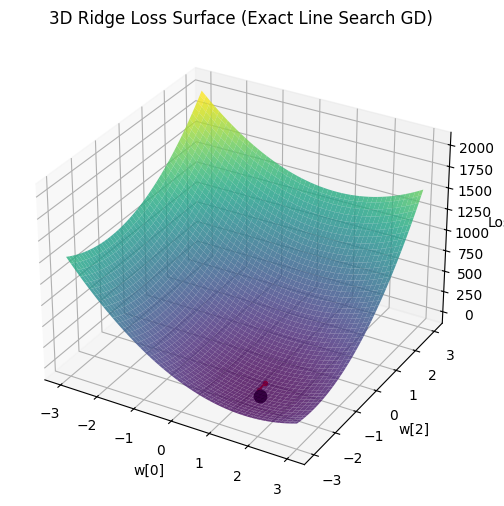

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def ridge_closed_form(X, y, lam):
    d = X.shape[1]
    return np.linalg.solve(X.T @ X + lam * np.eye(d), X.T @ y)

def ridge_gd_exact(X, y, lam, iterations=2000):
    d = X.shape[1]
    w = np.zeros(d)
    ws = []
    hist = []

    H = 2 * (X.T @ X + lam * np.eye(d))   # Hessian of ridge loss

    for _ in range(iterations):
        g = 2 * X.T @ (X @ w - y) + 2 * lam * w
        alpha = (g @ g) / (g @ (H @ g))
        w = w - alpha * g

        ws.append(w.copy())
        hist.append(np.linalg.norm(X @ w - y)**2 + lam * np.linalg.norm(w)**2)

    return w, np.array(ws), hist


rng = np.random.default_rng(0)
X = rng.normal(size=(50, 6))
true_w = np.array([1.5, 0.0, -2.0, 0.0, 0.0, 0.8])
y = X @ true_w + 0.1 * rng.normal(size=50)

lam = 0.5
w_cf = ridge_closed_form(X, y, lam)
w_gd, ws, hist = ridge_gd_exact(X, y, lam, iterations=2000)

print("Closed Form:", np.round(w_cf, 3))
print("Exact Line Search GD:", np.round(w_gd, 3))


i, j = 0, 2
w1 = np.linspace(-3, 3, 200)
w2 = np.linspace(-3, 3, 200)
W1, W2 = np.meshgrid(w1, w2)
Z = np.zeros_like(W1)

for a in range(W1.shape[0]):
    for b in range(W1.shape[1]):
        wv = w_cf.copy()
        wv[i] = W1[a,b]
        wv[j] = W2[a,b]
        Z[a,b] = np.linalg.norm(X @ wv - y)**2 + lam * np.linalg.norm(wv)**2

plt.figure(figsize=(7,5))
plt.contour(W1, W2, Z, levels=30)
plt.plot(ws[:,i], ws[:,j], 'r.-', label="Exact Line Search GD Path")
plt.scatter(w_cf[i], w_cf[j], c='green', s=80, label="Closed Form")
plt.title(f"Ridge Loss Contour (dims {i} vs {j})")
plt.xlabel(f"w[{i}]")
plt.ylabel(f"w[{j}]")
plt.legend()
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1, W2, Z, cmap='viridis', alpha=0.8)

Z_path = []
for w_val in ws:
    Z_path.append(np.linalg.norm(X @ w_val - y)**2 + lam * np.linalg.norm(w_val)**2)

ax.plot(ws[:,i], ws[:,j], Z_path, 'r.-', markersize=6)
ax.scatter(w_cf[i], w_cf[j], np.min(Z), c='black', s=80)

ax.set_title("3D Ridge Loss Surface (Exact Line Search GD)")
ax.set_xlabel(f"w[{i}]")
ax.set_ylabel(f"w[{j}]")
ax.set_zlabel("Loss")
plt.show()


# Armijo Line Search


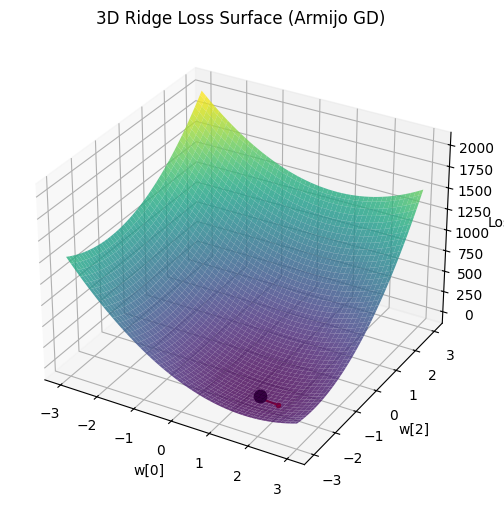

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def ridge_closed_form(X, y, lam):
    d = X.shape[1]
    return np.linalg.solve(X.T @ X + lam * np.eye(d), X.T @ y)

def armijo_gd(X, y, lam, beta=0.5, c=1e-4, iterations=1500):
    d = X.shape[1]
    w = np.zeros(d)
    ws = []
    hist = []

    def f(w):
        return np.linalg.norm(X @ w - y)**2 + lam * np.linalg.norm(w)**2

    for _ in range(iterations):
        g = 2 * X.T @ (X @ w - y) + 2 * lam * w
        t = 1.0
        fx = f(w)
        while f(w - t * g) > fx - c * t * np.dot(g, g):
            t *= beta
        w = w - t * g
        ws.append(w.copy())
        hist.append(f(w))

    return w, np.array(ws), hist

rng = np.random.default_rng(0)
X = rng.normal(size=(50, 6))
true_w = np.array([1.5, 0.0, -2.0, 0.0, 0.0, 0.8])
y = X @ true_w + 0.1 * rng.normal(size=50)

lam = 0.5
w_cf = ridge_closed_form(X, y, lam)
w_gd, ws, hist = armijo_gd(X, y, lam)

i, j = 0, 2
w1 = np.linspace(-3, 3, 150)
w2 = np.linspace(-3, 3, 150)
W1, W2 = np.meshgrid(w1, w2)
Z = np.zeros_like(W1)

for a in range(W1.shape[0]):
    for b in range(W1.shape[1]):
        wv = w_cf.copy()
        wv[i] = W1[a,b]
        wv[j] = W2[a,b]
        Z[a,b] = np.linalg.norm(X @ wv - y)**2 + lam * np.linalg.norm(wv)**2

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1, W2, Z, cmap='viridis', alpha=0.8)

Z_path = []
for wv in ws:
    Z_path.append(np.linalg.norm(X @ wv - y)**2 + lam * np.linalg.norm(wv)**2)

ax.plot(ws[:,i], ws[:,j], Z_path, 'r.-')
ax.scatter(w_cf[i], w_cf[j], np.min(Z), c='black', s=80)

ax.set_title("3D Ridge Loss Surface (Armijo GD)")
ax.set_xlabel(f"w[{i}]")
ax.set_ylabel(f"w[{j}]")
ax.set_zlabel("Loss")
plt.show()


# Stochastic Gradient Descent

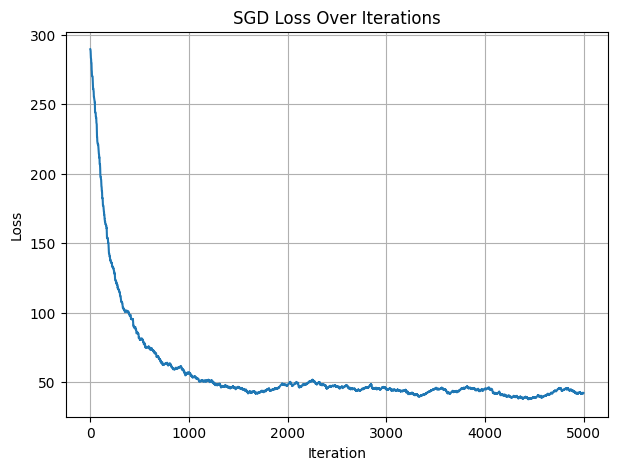

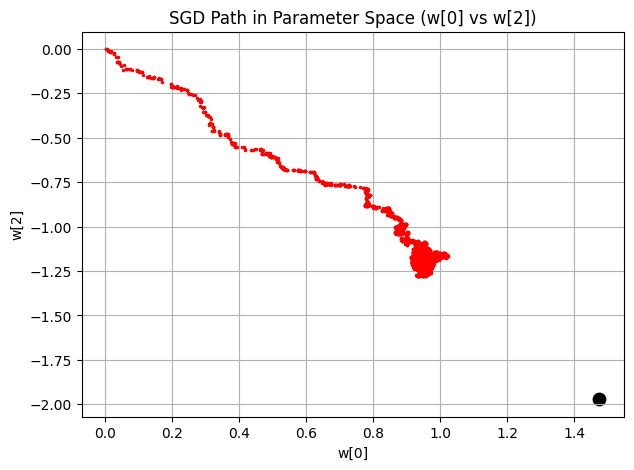

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def ridge_closed_form(X, y, lam):
    d = X.shape[1]
    return np.linalg.solve(X.T @ X + lam * np.eye(d), X.T @ y)

def ridge_sgd(X, y, lam, lr=1e-3, iterations=4000, batch_size=1):
    n, d = X.shape
    w = np.zeros(d)
    ws = []
    hist = []

    def f(w):
        return np.linalg.norm(X @ w - y)**2 + lam * np.linalg.norm(w)**2

    for _ in range(iterations):
        idx = np.random.randint(0, n, batch_size)
        Xb = X[idx]
        yb = y[idx]

        grad = 2 * Xb.T @ (Xb @ w - yb) + 2 * lam * w
        w = w - lr * grad

        ws.append(w.copy())
        hist.append(f(w))

    return w, np.array(ws), hist


rng = np.random.default_rng(0)
X = rng.normal(size=(50, 6))
true_w = np.array([1.5, 0.0, -2.0, 0.0, 0.0, 0.8])
y = X @ true_w + 0.1 * rng.normal(size=50)

lam = 0.5
w_cf = ridge_closed_form(X, y, lam)
w_sgd, ws, hist = ridge_sgd(X, y, lam, lr=1e-3, iterations=5000)

plt.figure(figsize=(7,5))
plt.plot(hist)
plt.title("SGD Loss Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

i, j = 0, 2
plt.figure(figsize=(7,5))
plt.plot(ws[:,i], ws[:,j], 'r.', markersize=3)
plt.scatter(w_cf[i], w_cf[j], c='black', s=80)
plt.title(f"SGD Path in Parameter Space (w[{i}] vs w[{j}])")
plt.xlabel(f"w[{i}]")
plt.ylabel(f"w[{j}]")
plt.grid(True)
plt.show()


# Nestrov Accelarated Gradient Descent

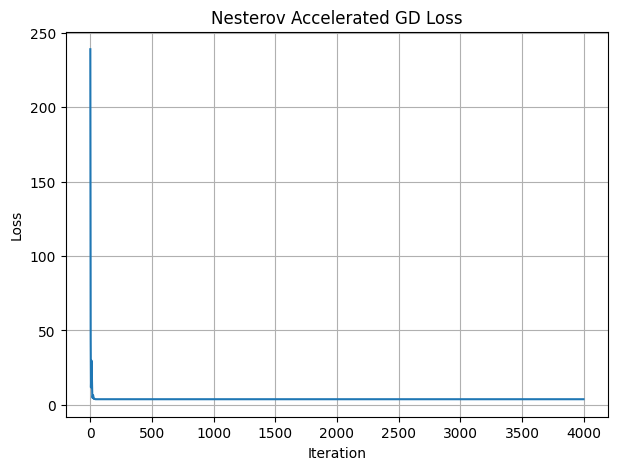

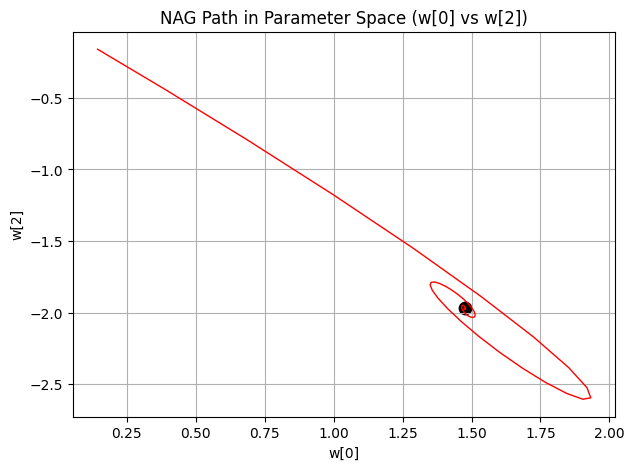

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def ridge_closed_form(X, y, lam):
    d = X.shape[1]
    return np.linalg.solve(X.T @ X + lam * np.eye(d), X.T @ y)

def ridge_nag(X, y, lam, lr=1e-3, gamma=0.9, iterations=3000):
    n, d = X.shape
    w = np.zeros(d)
    v = np.zeros(d)
    ws = []
    hist = []

    def f(w):
        return np.linalg.norm(X @ w - y)**2 + lam * np.linalg.norm(w)**2

    for _ in range(iterations):
        lookahead = w - gamma * v
        grad = 2 * X.T @ (X @ lookahead - y) + 2 * lam * lookahead
        v = gamma * v + lr * grad
        w = w - v
        ws.append(w.copy())
        hist.append(f(w))

    return w, np.array(ws), hist


rng = np.random.default_rng(0)
X = rng.normal(size=(50, 6))
true_w = np.array([1.5, 0.0, -2.0, 0.0, 0.0, 0.8])
y = X @ true_w + 0.1 * rng.normal(size=50)

lam = 0.5
w_cf = ridge_closed_form(X, y, lam)
w_ngd, ws, hist = ridge_nag(X, y, lam, lr=1e-3, gamma=0.9, iterations=4000)

plt.figure(figsize=(7,5))
plt.plot(hist)
plt.title("Nesterov Accelerated GD Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

i, j = 0, 2
plt.figure(figsize=(7,5))
plt.plot(ws[:,i], ws[:,j], 'r-', linewidth=1)
plt.scatter(w_cf[i], w_cf[j], c='black', s=80)
plt.title(f"NAG Path in Parameter Space (w[{i}] vs w[{j}])")
plt.xlabel(f"w[{i}]")
plt.ylabel(f"w[{j}]")
plt.grid(True)
plt.show()


# Adagrad

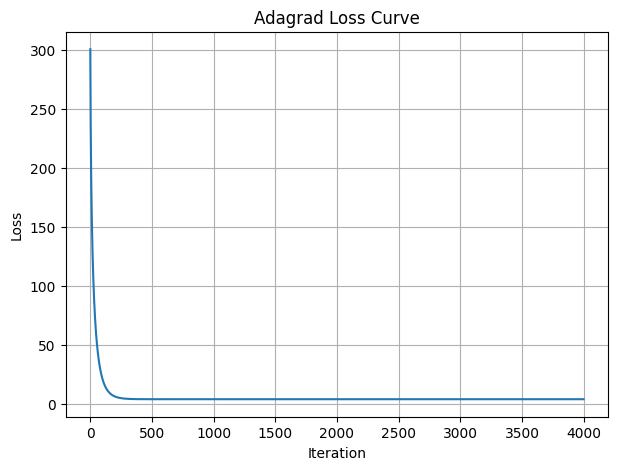

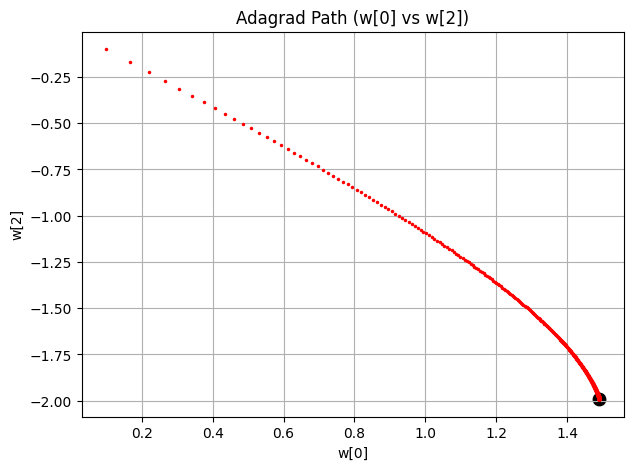

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def ridge_closed_form(X, y, lam):
    d = X.shape[1]
    return np.linalg.solve(X.T @ X + lam * np.eye(d), X.T @ y)

def ridge_adagrad(X, y, lam, lr=0.1, eps=1e-8, iterations=3000):
    n, d = X.shape
    w = np.zeros(d)
    G = np.zeros(d)
    ws = []
    hist = []

    def f(w):
        return np.linalg.norm(X @ w - y)**2 + lam * np.linalg.norm(w)**2

    for _ in range(iterations):
        g = 2 * X.T @ (X @ w - y) + 2 * lam * w
        G += g * g
        w = w - lr * g / (np.sqrt(G) + eps)
        ws.append(w.copy())
        hist.append(f(w))

    return w, np.array(ws), hist


rng = np.random.default_rng(0)
X = rng.normal(size=(60, 6))
true_w = np.array([1.5, 0.0, -2.0, 0.0, 0.0, 0.8])
y = X @ true_w + 0.1 * rng.normal(size=60)

lam = 0.5
w_cf = ridge_closed_form(X, y, lam)
w_ada, ws, hist = ridge_adagrad(X, y, lam, lr=0.1, iterations=4000)

plt.figure(figsize=(7,5))
plt.plot(hist)
plt.title("Adagrad Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

i, j = 0, 2
plt.figure(figsize=(7,5))
plt.plot(ws[:,i], ws[:,j], 'r.', markersize=3)
plt.scatter(w_cf[i], w_cf[j], c='black', s=80)
plt.title(f"Adagrad Path (w[{i}] vs w[{j}])")
plt.xlabel(f"w[{i}]")
plt.ylabel(f"w[{j}]")
plt.grid(True)
plt.show()


#RMS Props

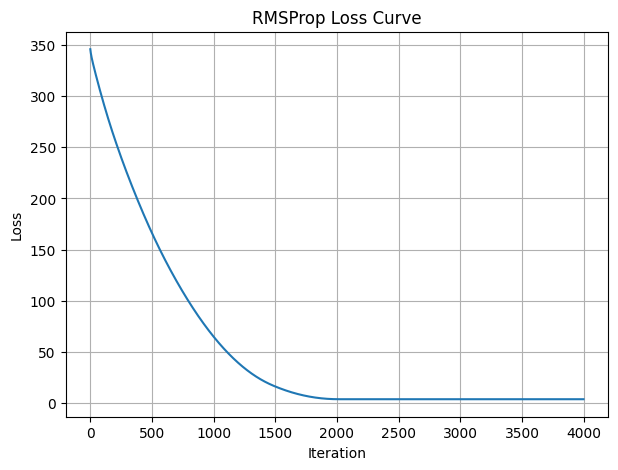

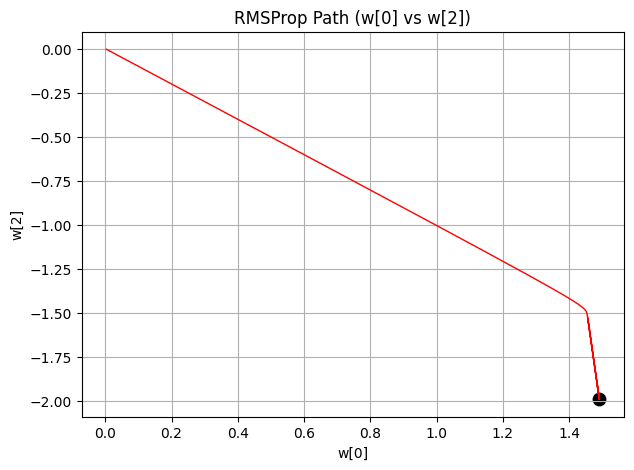

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def ridge_closed_form(X, y, lam):
    d = X.shape[1]
    return np.linalg.solve(X.T @ X + lam * np.eye(d), X.T @ y)

def ridge_rmsprop(X, y, lam, lr=1e-3, beta=0.9, eps=1e-8, iterations=3000):
    n, d = X.shape
    w = np.zeros(d)
    v = np.zeros(d)
    ws = []
    hist = []

    def f(w):
        return np.linalg.norm(X @ w - y)**2 + lam * np.linalg.norm(w)**2

    for _ in range(iterations):
        g = 2 * X.T @ (X @ w - y) + 2 * lam * w
        v = beta * v + (1 - beta) * (g * g)
        w = w - lr * g / (np.sqrt(v) + eps)
        ws.append(w.copy())
        hist.append(f(w))

    return w, np.array(ws), hist


rng = np.random.default_rng(0)
X = rng.normal(size=(60, 6))
true_w = np.array([1.5, 0.0, -2.0, 0.0, 0.0, 0.8])
y = X @ true_w + 0.1 * rng.normal(size=60)

lam = 0.5
w_cf = ridge_closed_form(X, y, lam)
w_rms, ws, hist = ridge_rmsprop(X, y, lam, lr=1e-3, iterations=4000)

plt.figure(figsize=(7,5))
plt.plot(hist)
plt.title("RMSProp Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

i, j = 0, 2
plt.figure(figsize=(7,5))
plt.plot(ws[:,i], ws[:,j], 'r-', linewidth=1)
plt.scatter(w_cf[i], w_cf[j], c='black', s=80)
plt.title(f"RMSProp Path (w[{i}] vs w[{j}])")
plt.xlabel(f"w[{i}]")
plt.ylabel(f"w[{j}]")
plt.grid(True)
plt.show()


# Adam's Optimizer


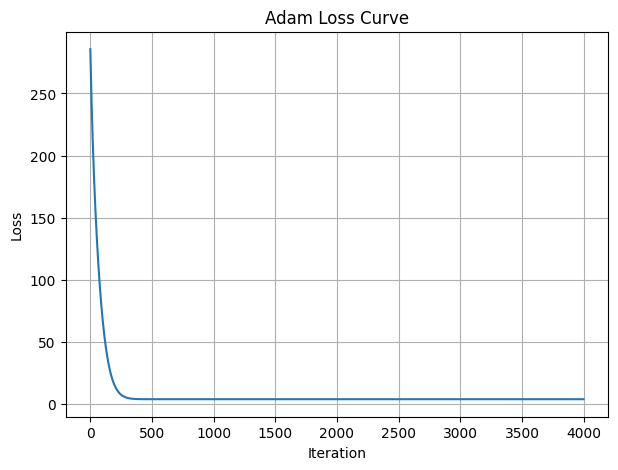

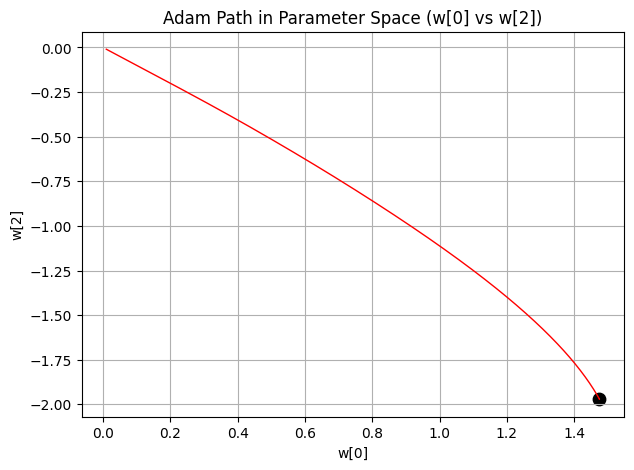

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def ridge_closed_form(X, y, lam):
    d = X.shape[1]
    return np.linalg.solve(X.T @ X + lam * np.eye(d), X.T @ y)

def ridge_adam(X, y, lam, lr=1e-2, beta1=0.9, beta2=0.999, eps=1e-8, iterations=3000):
    n, d = X.shape
    w = np.zeros(d)
    m = np.zeros(d)
    v = np.zeros(d)
    ws = []
    hist = []

    def f(w):
        return np.linalg.norm(X @ w - y)**2 + lam * np.linalg.norm(w)**2

    t = 0
    for _ in range(iterations):
        t += 1
        grad = 2 * X.T @ (X @ w - y) + 2 * lam * w

        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * (grad * grad)

        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)

        w = w - lr * m_hat / (np.sqrt(v_hat) + eps)

        ws.append(w.copy())
        hist.append(f(w))

    return w, np.array(ws), hist


rng = np.random.default_rng(0)
X = rng.normal(size=(50, 6))
true_w = np.array([1.5, 0.0, -2.0, 0.0, 0.0, 0.8])
y = X @ true_w + 0.1 * rng.normal(size=50)

lam = 0.5
w_cf = ridge_closed_form(X, y, lam)
w_adam, ws, hist = ridge_adam(X, y, lam, lr=1e-2, iterations=4000)

plt.figure(figsize=(7,5))
plt.plot(hist)
plt.title("Adam Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

i, j = 0, 2
plt.figure(figsize=(7,5))
plt.plot(ws[:,i], ws[:,j], 'r-', linewidth=1)
plt.scatter(w_cf[i], w_cf[j], c='black', s=80)
plt.title(f"Adam Path in Parameter Space (w[{i}] vs w[{j}])")
plt.xlabel(f"w[{i}]")
plt.ylabel(f"w[{j}]")
plt.grid(True)
plt.show()


#Exponential Weighted Moving Average ( EWMA )

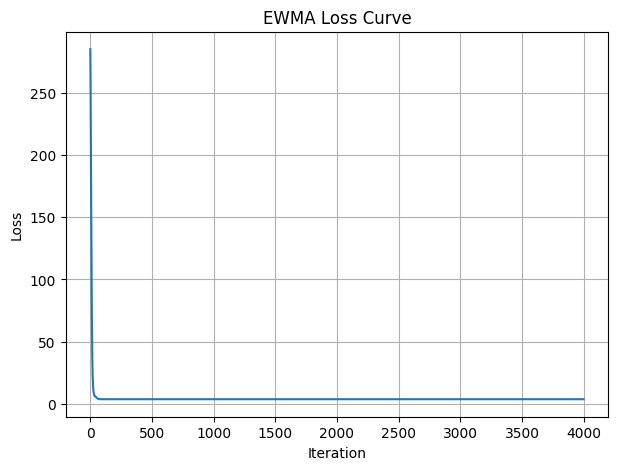

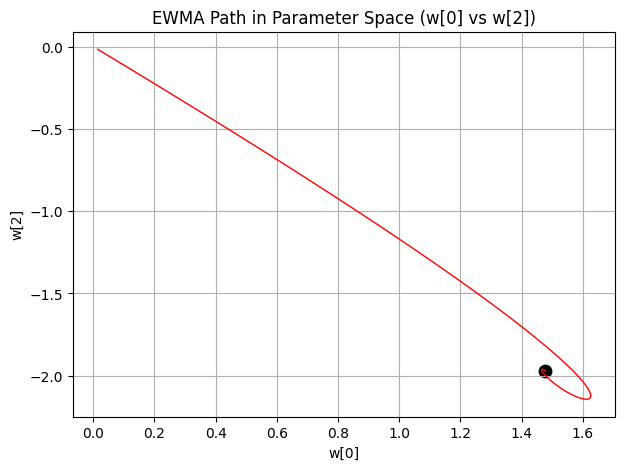

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def ridge_closed_form(X, y, lam):
    d = X.shape[1]
    return np.linalg.solve(X.T @ X + lam * np.eye(d), X.T @ y)

def ridge_ewma(X, y, lam, lr=1e-3, beta=0.9, iterations=3000):
    n, d = X.shape
    w = np.zeros(d)
    v = np.zeros(d)
    ws = []
    hist = []

    def f(w):
        return np.linalg.norm(X @ w - y)**2 + lam * np.linalg.norm(w)**2

    for _ in range(iterations):
        grad = 2 * X.T @ (X @ w - y) + 2 * lam * w
        v = beta * v + (1 - beta) * grad
        w = w - lr * v
        ws.append(w.copy())
        hist.append(f(w))

    return w, np.array(ws), hist


rng = np.random.default_rng(0)
X = rng.normal(size=(50, 6))
true_w = np.array([1.5, 0.0, -2.0, 0.0, 0.0, 0.8])
y = X @ true_w + 0.1 * rng.normal(size=50)

lam = 0.5
w_cf = ridge_closed_form(X, y, lam)
w_ewma, ws, hist = ridge_ewma(X, y, lam, lr=1e-3, beta=0.9, iterations=4000)

plt.figure(figsize=(7,5))
plt.plot(hist)
plt.title("EWMA Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

i, j = 0, 2
plt.figure(figsize=(7,5))
plt.plot(ws[:,i], ws[:,j], 'r-', linewidth=1)
plt.scatter(w_cf[i], w_cf[j], c='black', s=80)
plt.title(f"EWMA Path in Parameter Space (w[{i}] vs w[{j}])")
plt.xlabel(f"w[{i}]")
plt.ylabel(f"w[{j}]")
plt.grid(True)
plt.show()


# Sub-Gradient Descent

Final x: 0.0027064066027182587


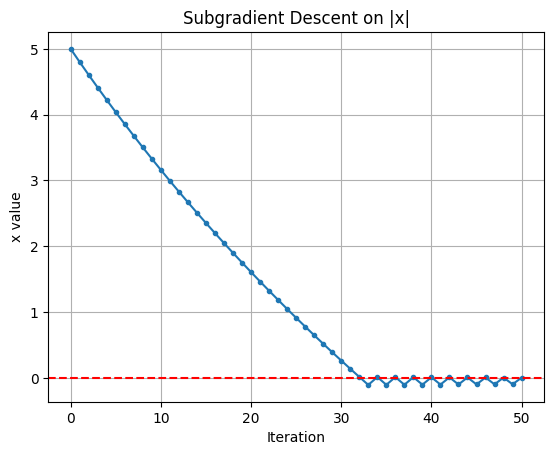

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def subgradient_descent(f_subgrad, x0=2.0, steps=100, alpha=lambda k: 0.1):
    x = x0
    history = [x]
    for k in range(steps):
        g = f_subgrad(x)
        x = x - alpha(k) * g
        history.append(x)
    return np.array(history)

def abs_subgrad(x):
    if x > 0: return 1.0
    if x < 0: return -1.0
    return 0.0

h = subgradient_descent(abs_subgrad, x0=5.0, steps=50, alpha=lambda k: 0.2/(1+0.02*k))
print("Final x:", h[-1])

plt.plot(h, marker='o', markersize=3)
plt.axhline(0, color='r', linestyle='--')
plt.title("Subgradient Descent on |x|")
plt.xlabel("Iteration")
plt.ylabel("x value")
plt.grid(True)
plt.show()


#Lasso Regularization

Lasso weights: [ 1.489e+00 -1.700e-02 -1.990e+00 -6.000e-03  1.000e-03  8.150e-01]


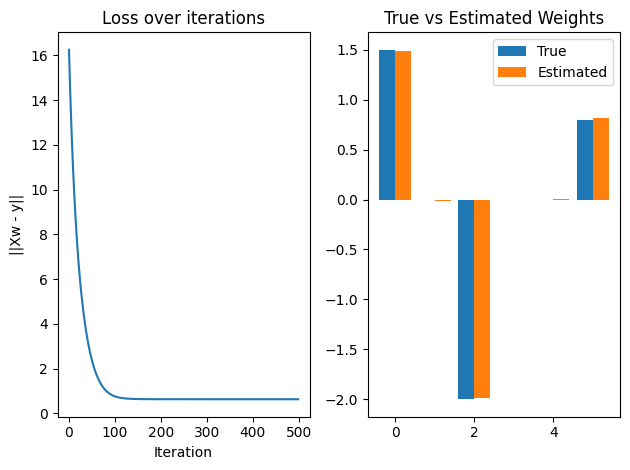

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def ista_lasso(X, y, lam=0.1, alpha=1e-3, iterations=200):
    n, d = X.shape
    w = np.zeros(d)
    hist = []
    for it in range(iterations):
        grad = X.T @ (X @ w - y)
        z = w - alpha * grad
        w = np.sign(z) * np.maximum(np.abs(z) - alpha * lam, 0.0)
        hist.append(np.linalg.norm(X @ w - y))
    return w, hist

rng = np.random.default_rng(0)
X = rng.normal(size=(50,6))
true_w = np.array([1.5,0.0,-2.0,0.0,0.0,0.8])
y = X @ true_w + 0.1*rng.normal(size=50)

w, hist = ista_lasso(X, y, lam=0.2, alpha=1e-3, iterations=500)
print("Lasso weights:", np.round(w,3))

plt.subplot(1,2,1)
plt.plot(hist)
plt.title("Loss over iterations")
plt.xlabel("Iteration")
plt.ylabel("||Xw - y||")

plt.subplot(1,2,2)
plt.bar(np.arange(len(true_w))-0.2, true_w, width=0.4, label='True')
plt.bar(np.arange(len(w))+0.2, w, width=0.4, label='Estimated')
plt.title("True vs Estimated Weights")
plt.legend()
plt.tight_layout()
plt.show()


# Ridge Regularization

Closed Form: [ 1.475 -0.019 -1.971 -0.014  0.004  0.806]
GD: [ 1.459 -0.016 -1.946 -0.019  0.003  0.794]


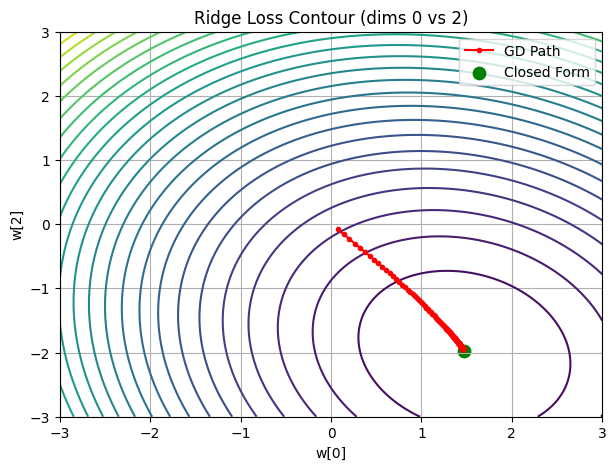

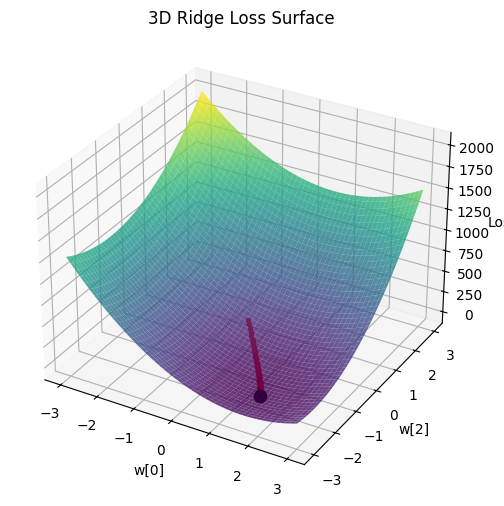

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def ridge_closed_form(X, y, lam):
    d = X.shape[1]
    return np.linalg.solve(X.T @ X + lam * np.eye(d), X.T @ y)

def ridge_gd(X, y, lam, alpha=1e-3, iterations=2000):
    d = X.shape[1]
    w = np.zeros(d)
    hist = []
    ws = []
    for i in range(iterations):
        grad = X.T @ (X @ w - y) + 2 * lam * w
        w = w - alpha * grad
        ws.append(w.copy())
        hist.append(np.linalg.norm(X @ w - y)**2 + lam * np.linalg.norm(w)**2)
    return w, np.array(ws), hist

rng = np.random.default_rng(0)
X = rng.normal(size=(50, 6))
true_w = np.array([1.5, 0.0, -2.0, 0.0, 0.0, 0.8])
y = X @ true_w + 0.1 * rng.normal(size=50)

lam = 0.5
w_cf = ridge_closed_form(X, y, lam)
w_gd, ws, hist = ridge_gd(X, y, lam, alpha=1e-3, iterations=5000)

print("Closed Form:", np.round(w_cf, 3))
print("GD:", np.round(w_gd, 3))

i, j = 0, 2
w1 = np.linspace(-3, 3, 150)
w2 = np.linspace(-3, 3, 150)
W1, W2 = np.meshgrid(w1, w2)
Z = np.zeros_like(W1)

for a in range(W1.shape[0]):
    for b in range(W1.shape[1]):
        wv = w_cf.copy()
        wv[i] = W1[a,b]
        wv[j] = W2[a,b]
        Z[a,b] = np.linalg.norm(X @ wv - y)**2 + lam * np.linalg.norm(wv)**2

plt.figure(figsize=(7,5))
plt.contour(W1, W2, Z, levels=30)
plt.plot(ws[:,i], ws[:,j], 'r.-', label="GD Path")
plt.scatter(w_cf[i], w_cf[j], c='green', s=80, label="Closed Form")
plt.title(f"Ridge Loss Contour (dims {i} vs {j})")
plt.xlabel(f"w[{i}]")
plt.ylabel(f"w[{j}]")
plt.legend()
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1, W2, Z, cmap='viridis', alpha=0.8)

Z_path = []
for w_val in ws:
    Z_path.append(np.linalg.norm(X @ w_val - y)**2 + lam * np.linalg.norm(w_val)**2)

ax.plot(ws[:,i], ws[:,j], Z_path, 'r.-', markersize=6)
ax.scatter(w_cf[i], w_cf[j], np.min(Z), c='black', s=80)

ax.set_title("3D Ridge Loss Surface")
ax.set_xlabel(f"w[{i}]")
ax.set_ylabel(f"w[{j}]")
ax.set_zlabel("Loss")
plt.show()


# Newton's Method

Root: 2.094551481698199


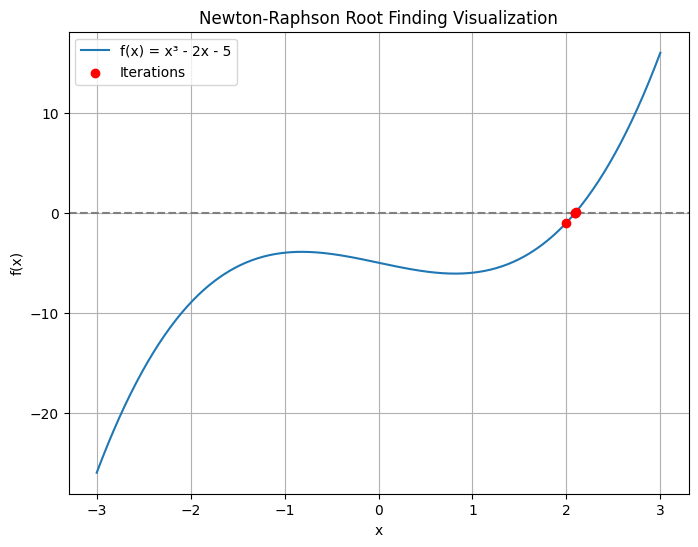

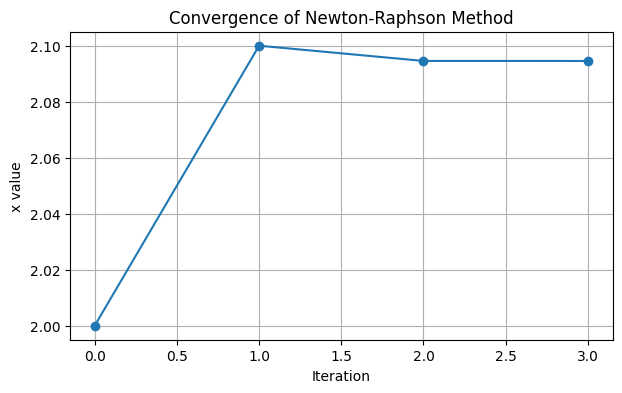

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def newton_root(f, df, x0, iters=20, tol=1e-8):
    x = x0
    xs = [x]
    for i in range(iters):
        dfx = df(x)
        if abs(dfx) < 1e-12:
            break
        x = x - f(x)/dfx
        xs.append(x)
        if abs(f(x)) < tol:
            break
    return x, xs

f = lambda x: x**3 - 2*x - 5
df = lambda x: 3*x**2 - 2

root, xs = newton_root(f, df, x0=2.0)
print("Root:", root)

x_vals = np.linspace(-3, 3, 400)
y_vals = f(x_vals)

plt.figure(figsize=(8,6))
plt.plot(x_vals, y_vals, label='f(x) = x³ - 2x - 5')
plt.axhline(0, color='gray', linestyle='--')
plt.scatter(xs, [f(x) for x in xs], color='red', zorder=5, label='Iterations')
plt.title("Newton-Raphson Root Finding Visualization")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(7,4))
plt.plot(range(len(xs)), xs, marker='o')
plt.title("Convergence of Newton-Raphson Method")
plt.xlabel("Iteration")
plt.ylabel("x value")
plt.grid(True)
plt.show()


#Lagrange Multiplier Method Equality Constrained

Optimal x: [0.090909 0.636364]


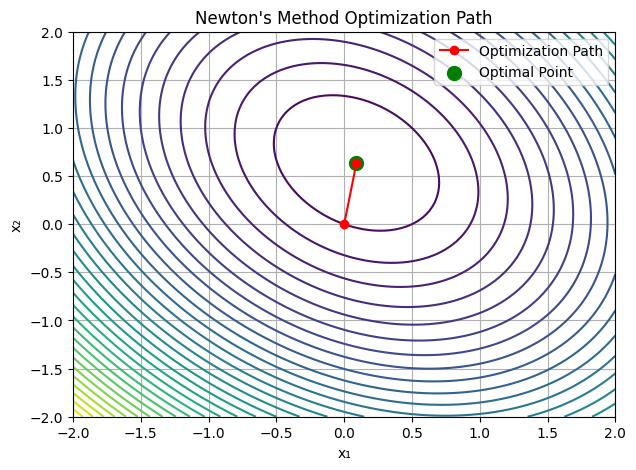

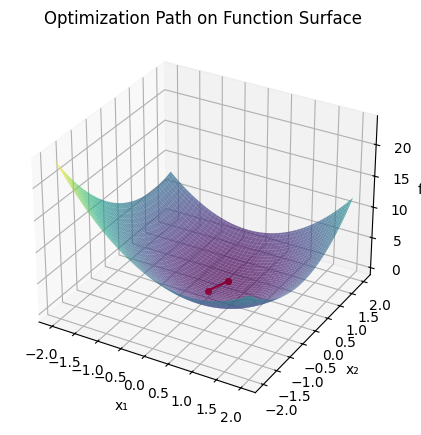

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def newton_opt(f_grad, f_hess, x0, iters=20, tol=1e-8):
    x = x0.copy()
    xs = [x.copy()]
    for i in range(iters):
        g = f_grad(x)
        H = f_hess(x)
        try:
            step = np.linalg.solve(H, g)
        except np.linalg.LinAlgError:
            step = np.linalg.pinv(H) @ g
        x = x - step
        xs.append(x.copy())
        if np.linalg.norm(g) < tol:
            break
    return x, np.array(xs)

A = np.array([[4.0, 1.0],[1.0, 3.0]])
b = np.array([-1.0, -2.0])
f = lambda x: 0.5 * x.T @ A @ x + b.T @ x
f_grad = lambda x: A@x + b
f_hess = lambda x: A

x_opt, xs = newton_opt(f_grad, f_hess, np.array([0.0,0.0]))
print("Optimal x:", np.round(x_opt,6))

x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = 0.5*(A[0,0]*X1**2 + 2*A[0,1]*X1*X2 + A[1,1]*X2**2) + b[0]*X1 + b[1]*X2

fig = plt.figure(figsize=(7,5))
plt.contour(X1, X2, Z, levels=30)
plt.plot(xs[:,0], xs[:,1], 'ro-', label='Optimization Path')
plt.scatter(x_opt[0], x_opt[1], c='green', s=100, label='Optimal Point')
plt.title("Newton's Method Optimization Path")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.legend()
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.7)
ax.plot(xs[:,0], xs[:,1], [f(x) for x in xs], 'r.-', markersize=8)
ax.set_title("Optimization Path on Function Surface")
ax.set_xlabel("x₁")
ax.set_ylabel("x₂")
ax.set_zlabel("f(x)")
plt.show()


# BFGS

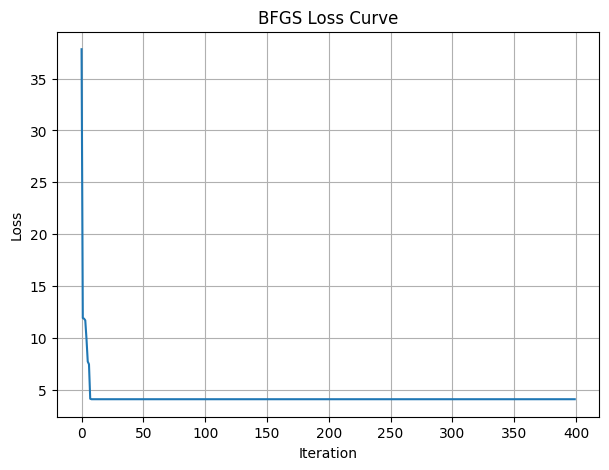

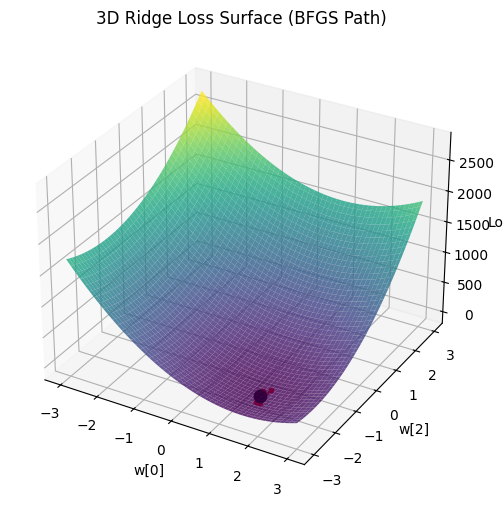

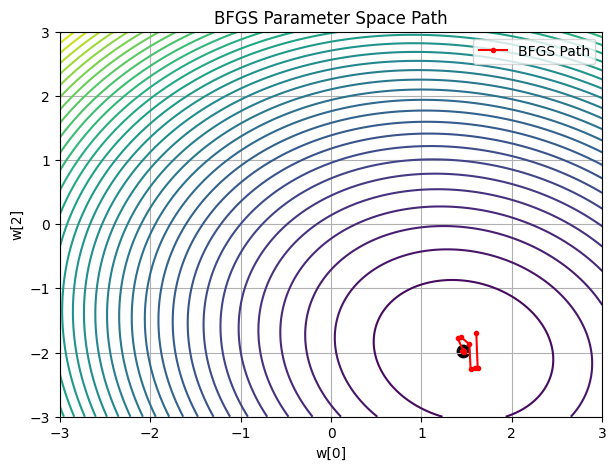

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def ridge_closed_form(X, y, lam):
    d = X.shape[1]
    return np.linalg.solve(X.T @ X + lam * np.eye(d), X.T @ y)

def f_val(X, y, lam, w):
    return np.linalg.norm(X @ w - y)**2 + lam * np.linalg.norm(w)**2

def grad_val(X, y, lam, w):
    return 2 * X.T @ (X @ w - y) + 2 * lam * w

def ridge_bfgs(X, y, lam, iterations=300):
    d = X.shape[1]
    w = np.zeros(d)
    B = np.eye(d)
    ws = []
    hist = []

    for _ in range(iterations):
        g = grad_val(X, y, lam, w)
        p = -np.linalg.solve(B, g)

        alpha = 1.0
        while f_val(X, y, lam, w + alpha * p) > f_val(X, y, lam, w) - 1e-4 * alpha * (g @ p):
            alpha *= 0.5

        w_new = w + alpha * p
        s = w_new - w
        g_new = grad_val(X, y, lam, w_new)
        yk = g_new - g

        if s @ yk > 1e-12:
            B = B + np.outer(yk, yk) / (yk @ s) - (B @ np.outer(s, s) @ B) / (s @ B @ s)

        w = w_new
        ws.append(w.copy())
        hist.append(f_val(X, y, lam, w))

    return w, np.array(ws), hist


rng = np.random.default_rng(0)
X = rng.normal(size=(70, 6))
true_w = np.array([1.5, 0.0, -2.0, 0.0, 0.0, 0.8])
y = X @ true_w + 0.1 * rng.normal(size=70)

lam = 0.5
w_cf = ridge_closed_form(X, y, lam)
w_bfgs, ws, hist = ridge_bfgs(X, y, lam, iterations=400)

plt.figure(figsize=(7,5))
plt.plot(hist)
plt.title("BFGS Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

i, j = 0, 2
w1 = np.linspace(-3, 3, 200)
w2 = np.linspace(-3, 3, 200)
W1, W2 = np.meshgrid(w1, w2)
Z = np.zeros_like(W1)

for a in range(W1.shape[0]):
    for b in range(W1.shape[1]):
        wv = w_cf.copy()
        wv[i] = W1[a,b]
        wv[j] = W2[a,b]
        Z[a,b] = f_val(X, y, lam, wv)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1, W2, Z, cmap='viridis', alpha=0.8)

Z_path = [f_val(X, y, lam, wv) for wv in ws]
ax.plot(ws[:,i], ws[:,j], Z_path, 'r.-', markersize=6)
ax.scatter(w_cf[i], w_cf[j], np.min(Z), c='black', s=80)

ax.set_title("3D Ridge Loss Surface (BFGS Path)")
ax.set_xlabel(f"w[{i}]")
ax.set_ylabel(f"w[{j}]")
ax.set_zlabel("Loss")
plt.show()

plt.figure(figsize=(7,5))
plt.contour(W1, W2, Z, levels=35, cmap='viridis')
plt.plot(ws[:,i], ws[:,j], 'r.-', label="BFGS Path")
plt.scatter(w_cf[i], w_cf[j], c='black', s=80)
plt.title("BFGS Parameter Space Path")
plt.xlabel(f"w[{i}]")
plt.ylabel(f"w[{j}]")
plt.legend()
plt.grid(True)
plt.show()


# KKT Conditions	Inequality Constrained

x*: [0.5 0.5]
lambda*: [-1.]


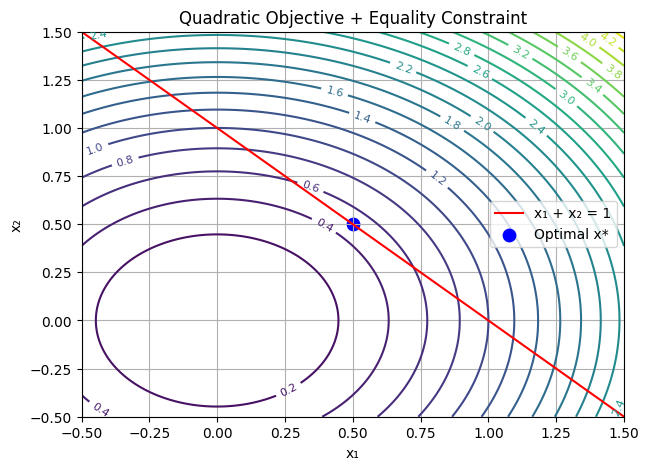

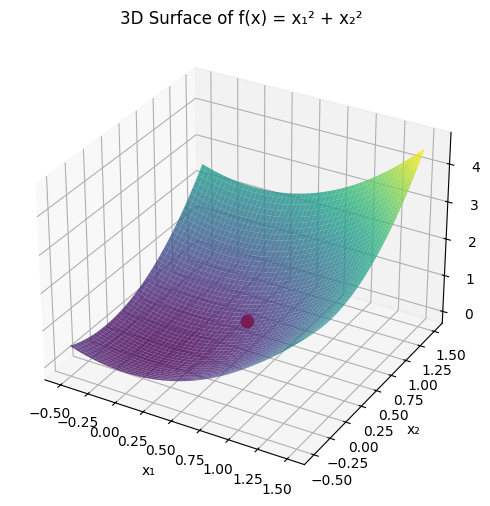

In [2]:

import numpy as np
import matplotlib.pyplot as plt

H = 2*np.eye(2)
g = np.zeros(2)
A_eq = np.array([[1.0,1.0]])
c_eq = np.array([1.0])

KKT_mat = np.block([[H, A_eq.T],[A_eq, np.zeros((1,1))]])
rhs = np.concatenate([-g, c_eq])
sol = np.linalg.solve(KKT_mat, rhs)

x = sol[:2]
lam = sol[2:]

print("x*:", np.round(x,6))
print("lambda*:", np.round(lam,6))

f = lambda x: x[0]**2 + x[1]**2

x1 = np.linspace(-0.5, 1.5, 200)
x2 = np.linspace(-0.5, 1.5, 200)
X1, X2 = np.meshgrid(x1, x2)
Z = X1**2 + X2**2

plt.figure(figsize=(7,5))
cs = plt.contour(X1, X2, Z, levels=25)
plt.clabel(cs, inline=True, fontsize=8)

line_x = np.linspace(-0.5, 1.5, 200)
line_y = 1 - line_x
plt.plot(line_x, line_y, 'r', label='x₁ + x₂ = 1')

plt.scatter(x[0], x[1], c='blue', s=80, label='Optimal x*')
plt.title("Quadratic Objective + Equality Constraint")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.legend()
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.8)

ax.scatter(x[0], x[1], f(x), c='red', s=80)
ax.set_title("3D Surface of f(x) = x₁² + x₂²")
ax.set_xlabel("x₁")
ax.set_ylabel("x₂")
ax.set_zlabel("f(x)")
plt.show()



# Active Set method

Optimal x: [-0. -0.]


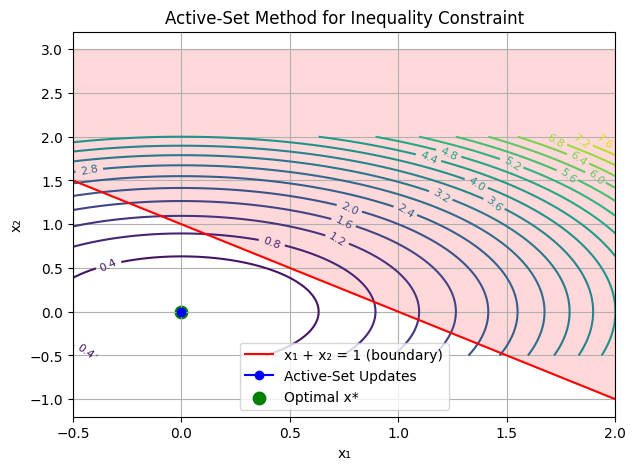

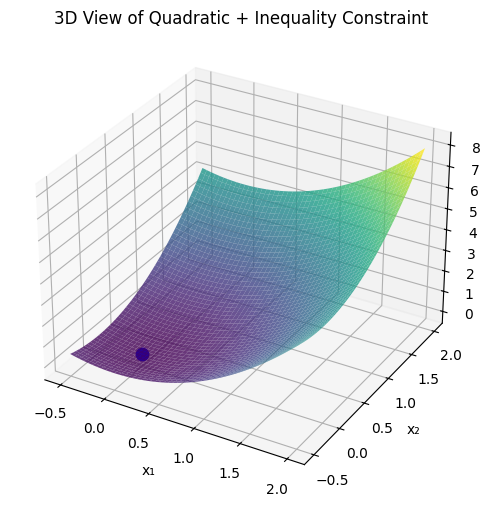

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def solve_kkt(H, g, A, b):
    KKT = np.block([[H, A.T],
                    [A, np.zeros((A.shape[0], A.shape[0]))]])
    rhs = -np.hstack([g, b])
    sol = np.linalg.solve(KKT, rhs)
    x = sol[:2]
    lam = sol[2:]
    return x, lam

def active_set_qp(H, g, A, b, x0, max_iter=10):
    x = x0.copy()
    active = []

    xs = [x.copy()]

    for _ in range(max_iter):
        A_act = A[active] if len(active) > 0 else np.zeros((0,2))
        b_act = b[active] if len(active) > 0 else np.zeros(0)

        if len(active) > 0:
            x_new, lam = solve_kkt(H, g, A_act, b_act)
        else:
            x_new = -np.linalg.solve(H, g)
            lam = []

        if np.linalg.norm(x_new - x) < 1e-8:
            x = x_new
            break

        violated = []
        for i in range(A.shape[0]):
            if A[i] @ x_new < b[i] - 1e-8:
                violated.append(i)

        if len(violated) == 0:
            if len(active) > 0:
                for idx, L in zip(active, lam):
                    if L < -1e-8:
                        active.remove(idx)
                        break
                else:
                    x = x_new
                    xs.append(x.copy())
                    break
            x = x_new
            xs.append(x.copy())
            continue

        for v in violated:
            if v not in active:
                active.append(v)

        x = x_new
        xs.append(x.copy())

    return x, np.array(xs)


H = 2*np.eye(2)
g = np.zeros(2)

A = np.array([[-1.0, -1.0]])
b = np.array([-1.0])

x0 = np.array([0.0, 0.0])
x_opt, path = active_set_qp(H, g, A, b, x0)

print("Optimal x:", np.round(x_opt,6))

f = lambda x: x[0]**2 + x[1]**2

x1 = np.linspace(-0.5, 2, 200)
x2 = np.linspace(-0.5, 2, 200)
X1, X2 = np.meshgrid(x1, x2)
Z = X1**2 + X2**2

plt.figure(figsize=(7,5))
cs = plt.contour(X1, X2, Z, levels=25)
plt.clabel(cs, inline=True, fontsize=8)

line_x = np.linspace(-0.5, 2, 200)
line_y = 1 - line_x
plt.plot(line_x, line_y, 'r', label='x₁ + x₂ = 1 (boundary)')
plt.fill_between(line_x, line_y, 3, color='red', alpha=0.15)

plt.plot(path[:,0], path[:,1], 'bo-', label='Active-Set Updates')
plt.scatter(x_opt[0], x_opt[1], c='green', s=80, label='Optimal x*')

plt.title("Active-Set Method for Inequality Constraint")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.legend()
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.8)

ax.plot(path[:,0], path[:,1], [f(p) for p in path], 'r.-', markersize=8)
ax.scatter(x_opt[0], x_opt[1], f(x_opt), c='blue', s=80)

ax.set_title("3D View of Quadratic + Inequality Constraint")
ax.set_xlabel("x₁")
ax.set_ylabel("x₂")
ax.set_zlabel("f(x)")
plt.show()
